# Problem Statment

Banks rely heavily on term deposits as a significant source of income. A term deposit is a financial product where customers invest a sum of money with a bank for a predetermined duration at an agreed interest rate. To promote term deposits, banks utilize various marketing strategies such as email campaigns, advertisements, telephonic outreach, and digital marketing.

Among these, telephonic marketing remains one of the most effective methods for engaging potential customers.Often, multiple calls to the same client were required to determine whether they would subscribe to a term deposit.However, it involves substantial costs due to the need for extensive call center operations.To optimize resources, it is essential to identify and prioritize customers who are most likely to subscribe to term deposits.The goal of this classification task is to predict whether a customer will opt for a term deposit (target variable: y).

## About Dataset

The dataset pertains to direct marketing campaigns conducted by a Portuguese banking institution, primarily through phone calls. In many cases, multiple contacts with the same client were necessary to determine whether they would subscribe ('yes') or not ('no') to the bank's term deposit product. The data folder includes two separate datasets:-

    train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
    test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv

The dataset is available on Kaggle paltform, and further analysis will be conducted after downloading it from the Kaggle platform.

Kaggle Path : https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets


### Detailed Column Descriptions bank client data:

    1 - age (numeric)
    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
    "blue-collar","self-employed","retired","technician","services")
    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4 - education (categorical: "unknown","secondary","primary","tertiary")
    5 - default: has credit in default? (binary: "yes","no")
    6 - balance: average yearly balance, in euros (numeric)
    7 - housing: has housing loan? (binary: "yes","no")
    8 - loan: has personal loan? (binary: "yes","no")

    related with the last contact of the current campaign:
    9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
    10 - day: last contact day of the month (numeric)
    11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
    12 - duration: last contact duration, in seconds (numeric)

    other attributes:
    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    15 - previous: number of contacts performed before this campaign and for this client (numeric)
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

    Output variable (desired target):
    17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### What is Kaggle

Kaggle is a comprehensive platform that grants access to thousands of datasets and fosters a vibrant community of data scientists and machine learning practitioners. It facilitates collaboration and knowledge sharing through project contributions. The platform offers datasets of varying sizes, ranging from a few hundred rows to millions, catering to diverse project requirements. Additionally, Kaggle hosts competitions where participants can develop and showcase machine learning models to solve specific challenges.

### Citation

This dataset is publicly available for research and has been sourced from the UCI Machine Learning Repository. It relates to direct marketing campaigns conducted by a Portuguese banking institution. These campaigns were primarily executed through phone calls and aimed to promote term deposits to existing customers.

https://archive.ics.uci.edu/dataset/222/bank+marketing .

# Importing necesssary libraries

In [1]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

# Importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Train and test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Building decision tree
from sklearn.tree import DecisionTreeClassifier

# Library for buiding RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

#Importing metrics and accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Importing metrics for data imabalce
from imblearn.over_sampling import SMOTE

#supressing warnings
import warnings
warnings.filterwarnings("ignore")

# Steps for downloading Kaggle data  using opendatasets in Jupyternotebook

- The opendatasets library in Python simplifies the process of downloading datasets from popular online sources like Kaggle, Google Drive,

In [3]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing opendatases

import opendatasets as od

In [5]:
# Definging dataset path for downloading the dataset from Kaggle
dataset = 'https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets'

In [6]:
#Downloading the dataset. Force = True forcefully downlaod the file if it is already downloaded.
od.download(dataset,force=True)

Dataset URL: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets


100%|████████████████████████████████████████████████████████████████████████████████| 576k/576k [00:01<00:00, 435kB/s]

In [7]:
import os

In [8]:
data_dir = './banking-dataset-marketing-targets'

In [9]:
os.listdir(data_dir)

['test.csv', 'train.csv']

In [10]:
# Load the dataset 
inp0 = pd.read_csv('./banking-dataset-marketing-targets/train.csv',delimiter=";")
inp0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Initial inspection of the dataset

In [11]:
#Examine the shape
inp0.shape

(45211, 17)

- The dataset consists of a total of 45,211 observations and 17 features.

In [12]:
# More detailed summary of the dataset
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<b><i><font color=#800000> Inference:</font>
- The dataset contains 45,211 entries for every feature, confirming there are no missing values.
- According to the output of the info() method, 7 features are of integer type, while the remaining 10 are of object datatype.
- The dataset utilizes 5.9 MB of memory.

In [13]:
#Checking for nulls
inp0.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<b><i><font color=#800000> Inference:</font>
- No missing values are present in any feature of the dataset.

In [14]:
#Checking for duplicate observations
inp0.duplicated().sum()

0

<b><i><font color =#800000>Inferecne:</font>
- There are not duplicate observations pesent in the dataset

In [15]:
#Examine the Descriprtive statistica Summary
inp0.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


<b><i><font color =#800000>Inference:</font>
      
    1. Age featrue is continuous in nature. Minimum age: 18, Maximum age: 95. Age distribution: 25% are below 33 years, 50% are  below 39 years (median), and 75% are below 48 years.
    2. Job featur is categorical in nature. Total unique job categories: 12 and Most common job is"blue-collar," with 9,732 observations.
    3. Marital feature is categorical in natrue. Unique status are 3 and most common status is "married" with 27,214 observations.
    4. Education feature is categorical in nature.Unique education levels are 4 and most frequent education level is "Secondary" with 23,202 obervations.
    5. Credit defualt is binary in nature and majority credit defulat is "No" with 44,396 obervations.
    6. Balance feature is continuous in nature , range is minimum of -8,019 and maximum of 102,127.
    7. Housing Loan feature is binary in nature and majority people had housing loan with 25,130 observations.
    8. Personal Loan feature is binary in nature and majority of the prople ddidn't have the personal loan with 37,967 observations.
    9. Contact type feature is categorical in nature. Unique contact types are 3 and most common contact type is "cellular" with 29,285 observations.
    10. Target variable is binary in nature. Most of the majority obserations are "no" with 39,222 observations. 

### Age Variable

In [16]:
# Decsrie Age variable
inp0.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

- Age featrue is continuous in nature. Minimum age: 18, Maximum age: 95. Age distribution: 25% are below 33 years, 50% are  below 39 years (median), and 75% are below 48 years.

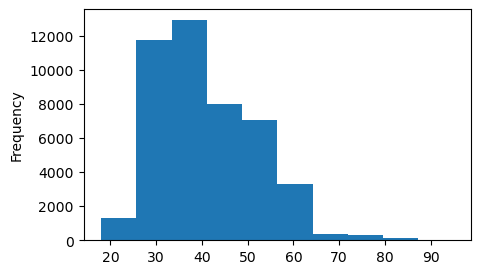

In [17]:
# Plot histogram
plt.figure(figsize=(5,3))
inp0.age.plot.hist()
plt.show()

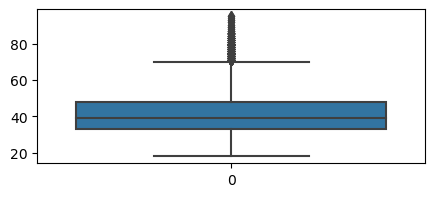

In [18]:
#plot the boxplot of age variable.
plt.figure(figsize=(5,2))
sns.boxplot(inp0.age)
plt.show()

# Balance Feature

In [19]:
# Describe Salary feature
inp0.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

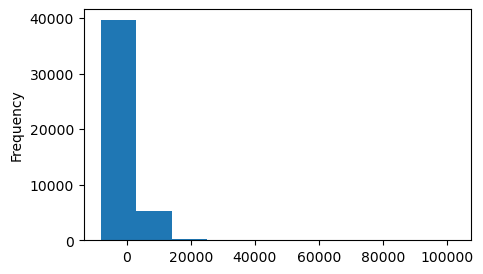

In [20]:
# Plot histogram
plt.figure(figsize=(5,3))
inp0.balance.plot.hist()
plt.show()

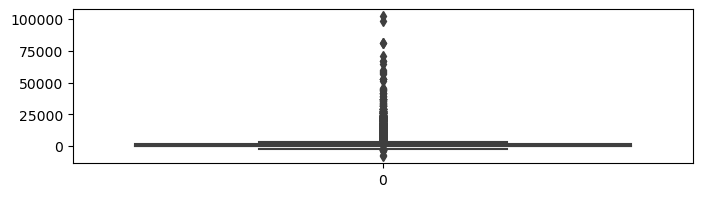

In [21]:
#plot the boxplot of balance variable.
plt.figure(figsize=[8,2])
sns.boxplot(inp0.balance)
plt.show()

# Duration Feature

In [22]:
inp0.duration.head(10)

0    261
1    151
2     76
3     92
4    198
5    139
6    217
7    380
8     50
9     55
Name: duration, dtype: int64

In [23]:
#describe the duration variable
inp0.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

#  Univariate Analysis
## Categorical unordered univariate analysis

Unordered data do not have the notion of high-low, more-less etc. Example:

Job category of persone.
Marital status of any one.

#### Marital Feature

In [24]:
# calcualte the percentage of each marital status category. 
inp0.marital.value_counts(normalize=True)*100

marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64

- 60% of the people are married
- 28% of the people are single
- 11% of the peopel are divorced

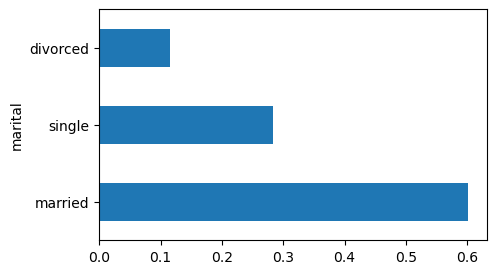

In [25]:
#plot the bar graph of percentage marital status categories
plt.figure(figsize=(5,3))
inp0.marital.value_counts(normalize=True).plot.barh()
plt.show()

- Married individuals have the highest count, followed by single and divorced individuals, respectively.

#### Job Feature

In [26]:
# calcualte the percentage of each Job category. 
inp0.job.value_counts(normalize=True)*100

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

- 21% of peopel job category is blue-collar
- 20% of people job category is Mangement
- 16% of people are technician
- 11% of people are admin
- 2 % of people are student.
- 5 % are retired people.
- 2 % of people are unemploed and another 2 % of people are housemaid.

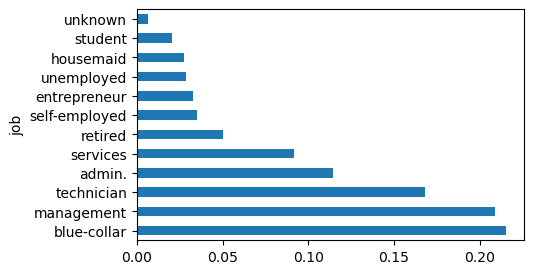

In [27]:
#plot the bar graph of percentage marital status categories
plt.figure(figsize=(5,3))
inp0.job.value_counts(normalize=True).plot.barh()
plt.show()

## Categorical ordered univariate analysis

ordered data have the notion of high-low, more-less etc. Example:

Educcation.
poutcome.

#### Education

In [28]:
#calculate the percentage of each Education category.
inp0.education.value_counts(normalize=True)*100

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

- 51% peopel completed secondary education, 29% people are belongs to rertiary education adn 15% people are primary educations.
- 4% people din't provided their education details

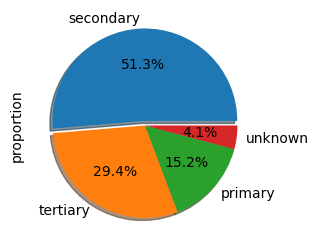

In [29]:
plt.figure(figsize=(5,3))
inp0.education.value_counts(normalize=True).plot.pie(explode=[0.05,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### poutcome Feature

In [30]:
#calculate the percentage of each poutcode category.
inp0.poutcome.value_counts(normalize=True)*100

poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64

- 3% are success, 10% are faulure , 81% are unknown

In [31]:
inp0[-(inp0.poutcome=="unknown")].poutcome.value_counts(normalize=True)*100

poutcome
failure    59.391663
other      22.297625
success    18.310713
Name: proportion, dtype: float64

- After removing unknow , 18% sucess, 59% failure.

<Axes: ylabel='proportion'>

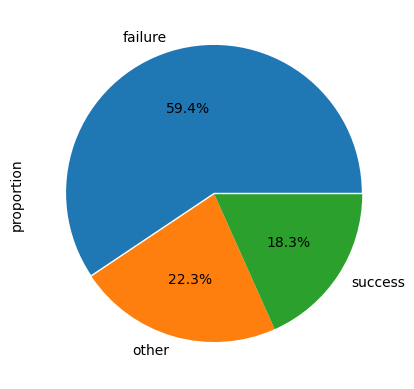

In [32]:
inp0[-(inp0.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.pie(explode=[0.01,0,0],autopct='%1.1f%%')

#### Target Variable

In [33]:
#calculate the percentage of each category.
inp0.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

- 88% of the people not opeted for term deposit.
- 11% of the people are opted for term deposit.
- This dataset is quite imbalanced, with the classes not equally represented. Only 5,289 customers (11.69%) have subscribed to the term deposit, compared to 39,922 observations where customers have not subscribed.

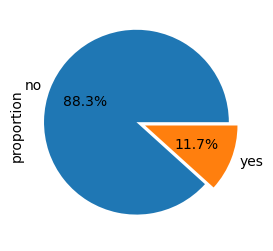

In [34]:
#plot the pie chart of response categories
plt.figure(figsize=(5,3))
inp0.y.value_counts(normalize= True).plot.pie(explode=[0.1,0],autopct='%1.1f%%')
plt.show()

#  Bivariate and Multivariate Analysis
## Numeric- numeric analysis
- Scatter plot: describes the pattern that how one variable is varying with other variable.
- Correlation matrix: to describe the linearity of two numeric variables.
- Pair plot: group of scatter plots of all numeric variables in the data frame.

<Figure size 300x200 with 0 Axes>

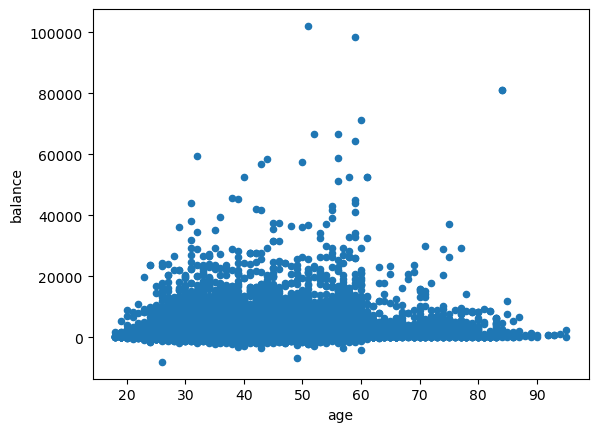

In [35]:
#plot the scatter plot of balance and age variable in inp0
plt.figure(figsize=(3,2))
inp0.plot.scatter(x='age', y='balance')
plt.show()

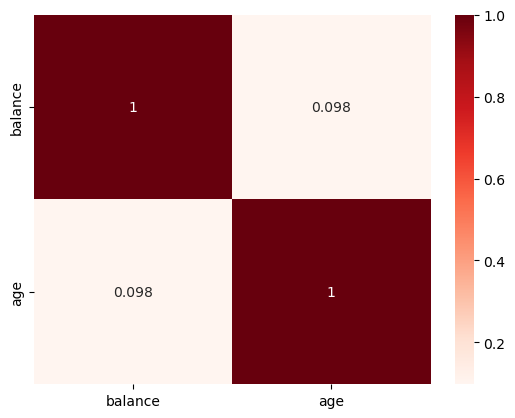

In [36]:
#plot the correlation matrix of balance and age in inp1 dataframe.
sns.heatmap( inp0[["balance", "age"]].corr(), annot= True, cmap= "Reds")
plt.show()

- Age and Balance not weekly corelated each othe

#### Numerical categorical variable

In [37]:
#groupby the target find the mean of the balance with response no & yes seperatly.
inp0.groupby("y")["balance"].mean()

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

In [38]:
#groupby the target find the meadian of the balance with response no & yes seperatly.
inp0.groupby("y")["balance"].median()

y
no     417.0
yes    733.0
Name: balance, dtype: float64

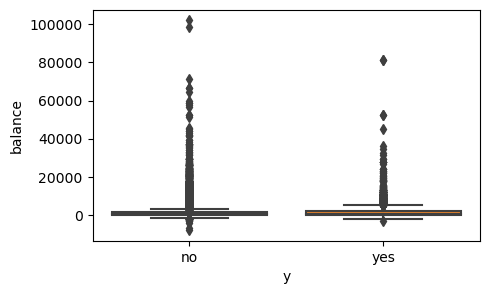

In [39]:
#plot the box plot of salary for yes & no responses.
plt.figure(figsize=(5,3))
sns.boxplot(data=inp0,x="y", y="balance")
plt.show()

#### Categorical categorical variable

In [40]:
#create target_flag of numerical data type where response "yes"= 1, "no"= 0
inp0["target_flag"]=np.where(inp0.y=="yes", 1, 0)
inp0.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [41]:
inp0.target_flag.mean()

0.11698480458295547

#### Education Vs Target Flag

In [42]:
#calculate the mean of target_flag with different education categories.
inp0.groupby("education")['target_flag'].mean()

education
primary      0.086265
secondary    0.105594
tertiary     0.150064
unknown      0.135703
Name: target_flag, dtype: float64

- 15% of people from tertiary are subscribed for the Term Deposit.
- 13% of peope who is not revelaed their education are subscribed for the Tem Deposit.
- 10% of peoeple from secondiary education are subscried fro TErm deposti.

#### Marital vs Target Flag

In [43]:
inp0.groupby("marital")["target_flag"].mean()

marital
divorced    0.119455
married     0.101235
single      0.149492
Name: target_flag, dtype: float64

- Single and diveorced peopel are subscribed more for Term Deposit than the Married peopel.

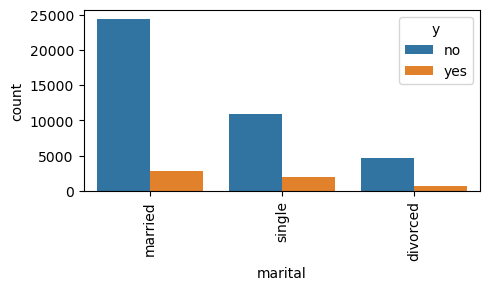

In [44]:
plt.figure(figsize=(5,3))
sns.countplot(data = inp0,x="marital",hue="y")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
inp0.groupby("marital")["y"].value_counts()

marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
Name: count, dtype: int64

- Married individuals have the highest count of term deposit subscriptions, followed by single and divorced individuals, respectively.
- Term deposit subscriptions include 14% single individuals, 11% divorced individuals, and 10% married individuals.

#### Hosing Loan Vs Target Flag

In [46]:
inp0.groupby("housing")["target_flag"].mean()

housing
no     0.167024
yes    0.077000
Name: target_flag, dtype: float64

- 16% of people who is not having housing loan had subscrived for Term Deposit. 

#### Personal Loan Vs Target Flag

In [47]:
inp0.groupby("loan")["target_flag"].mean()

loan
no     0.126557
yes    0.066814
Name: target_flag, dtype: float64

-12% of people who is not having personal loan had subscrived for Term Deposit.

### Age vs Target variable

    minimum of customer age is 18 and maximum is 95 according to df.describe().
    so to have count of each age the bins argument should be 95-18+1.

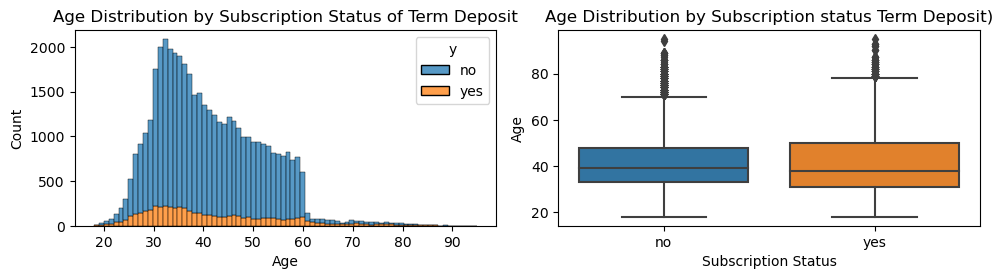

In [48]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.histplot(data=inp0, x='age', bins=95-18+1, hue='y', multiple='stack')
plt.title('Age Distribution by Subscription Status of Term Deposit')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.boxplot(data=inp0, x='y', y='age')
plt.title('Age Distribution by Subscription status Term Deposit)')
plt.xlabel('Subscription Status')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

- According to boxplot, age 70 will be considerd are outliers.

#### making buckets from age columns

In [49]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
pd.cut(inp0.age[:5],[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [50]:
inp0["age_group"]=pd.cut(inp0.age,[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])
inp0.age_group.value_counts(normalize= True)*100

age_group
30-40    39.121010
40-50    24.858994
50-60    17.843003
<30      15.549313
60+       2.627679
Name: proportion, dtype: float64

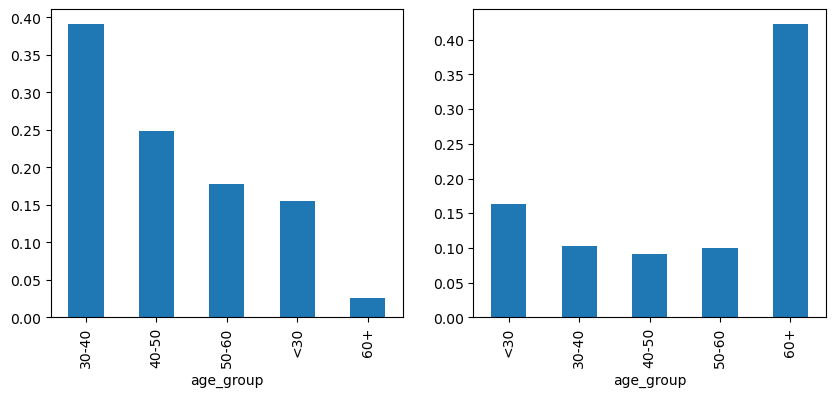

In [51]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
inp0.age_group.value_counts(normalize= True).plot.bar()
plt.subplot(1, 2, 2)
inp0.groupby(['age_group'])['target_flag'].mean().plot.bar()
plt.show()

- 60+  Age category people are more subscribed for term deposit. 

### Job vs Target variable

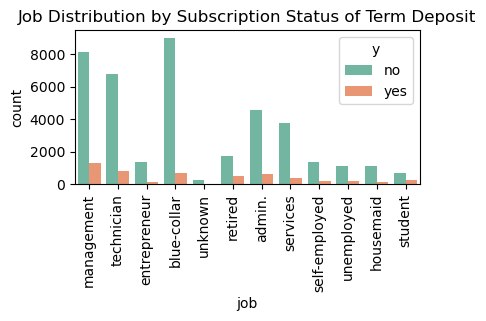

In [52]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1)
sns.countplot(data=inp0,x="job",hue="y",palette='Set2')
plt.title("Job Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [53]:
inp0.groupby("job")["y"].value_counts()

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: count, dtype: int64

- <b>Blue-collar workers</b> have the highest count of individuals who did not subscribe to the term deposit (9,024), followed by those in management (8,157) and technicians (6,757).
- <b>Management</b> has the highest count of individuals who subscribed to the term deposit (1,301), followed by technicians (840) and admin (631).
- The <b>'unknown' </b>job category has the lowest count of both non-subscribers (254) and subscribers (34), indicating it might represent missing or unspecified data.
- <b>Students</b> have a relatively high subscription rate (269) compared to their non-subscription count (669), suggesting a higher interest in term deposits among this group.
- <b>Retired</b> individuals also show a notable subscription rate (516) compared to their non-subscription count (1,748), indicating a higher likelihood of subscribing to term deposits.
- <b>Entrepreneurs</b> and <b>housemaids</b> have lower counts of both non-subscribers and subscribers, indicating these groups are less represented in the dataset.
- These observations highlight the varying subscription rates across different job categories, with certain groups showing a higher propensity for term deposit subscriptions.

#### Education Vs Taget Feature

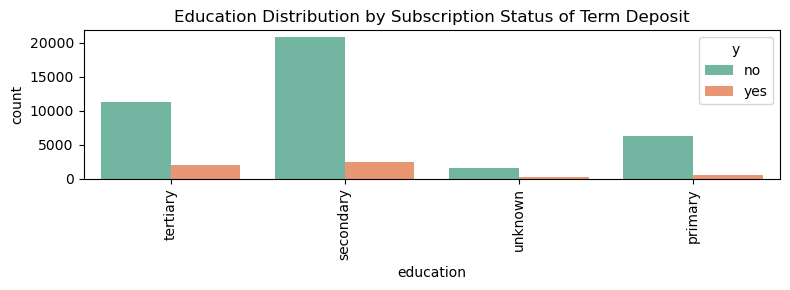

In [54]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="education",hue='y',palette="Set2")
plt.title("Education Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [55]:
inp0.groupby("education")["y"].value_counts()

education  y  
primary    no      6260
           yes      591
secondary  no     20752
           yes     2450
tertiary   no     11305
           yes     1996
unknown    no      1605
           yes      252
Name: count, dtype: int64

- This indicates that customers with secondary education have the highest count of term deposit subscriptions, followed by those with tertiary and primary education. The 'unknown' category has the lowest count of term deposit subscriptions,which can be considered as missing data.

#### Balance Vs Taget Feature

- balance feature represents the average yearly balance for each customer.
- Based on the descriptive statistics provided, the minimum value is -8019, the maximum is 102127, the mean is approximately 1362, and the standard deviation is 3044.
- These statistics indicate a wide range of values and a significant number of outliers.

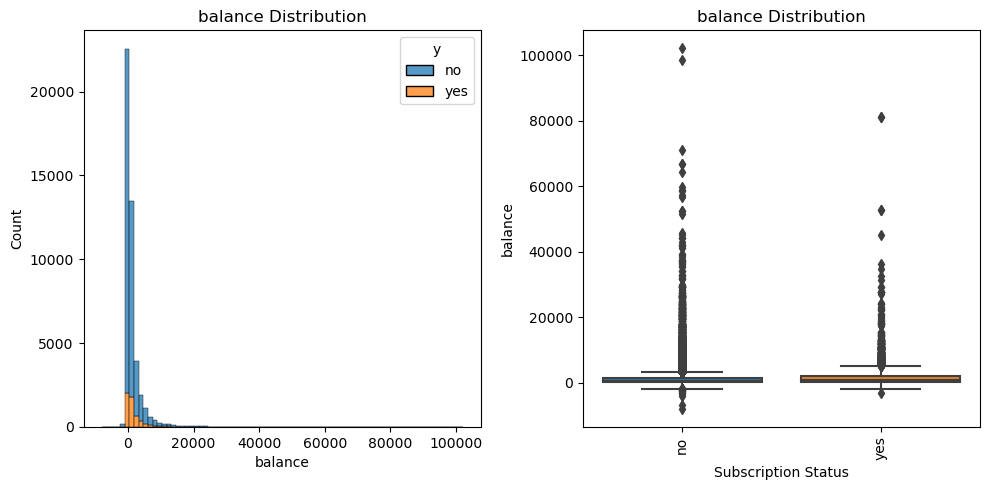

In [56]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=inp0, x='balance', bins=95-18+1, hue='y', multiple='stack')
plt.title('balance Distribution')
plt.xlabel('balance')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.boxplot(data=inp0, x='y', y='balance')
plt.title('balance Distribution')
plt.xlabel('Subscription Status')
plt.ylabel('balance')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- From the histogram and boxplot above, we can observe the frequency of the values and identify the outliers. Additionally, the balance data is right-skewed, with the mean being greater than the median.

#### default VS Target feature

- The default feature indicates whether the customer has credit in default.

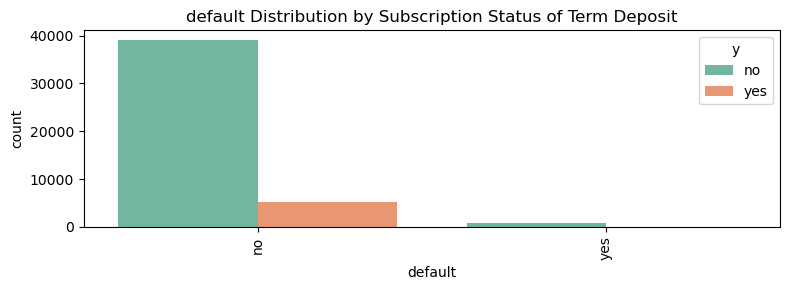

In [57]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="default",hue='y',palette="Set2")
plt.title("default Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [58]:
inp0.groupby("default")["y"].value_counts()

default  y  
no       no     39159
         yes     5237
yes      no       763
         yes       52
Name: count, dtype: int64

- 39,159 customers with no credit default and 52 cusotmers with credit defualt did not subscribe to the term deposit.
- 5,237 customers with no credit default and 763 sutoemrs with credit defualt did subscribe to the term deposit.
- This indicates that customers without credit default are more likely to subscribe to the term deposit compared to those with credit default.

#### housing VS Target feature

- The housing feature indicates whether the customer has house loan or not.

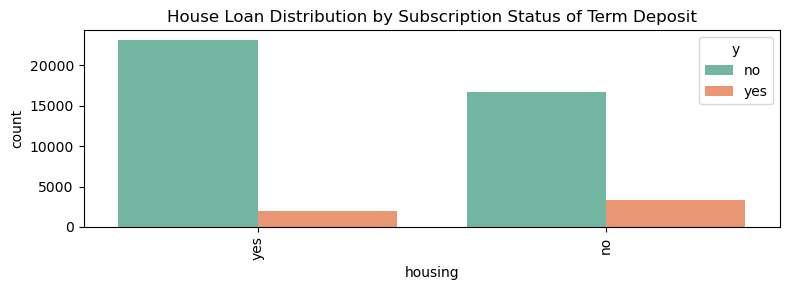

In [59]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="housing",hue='y',palette="Set2")
plt.title("House Loan Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [60]:
inp0.groupby("housing")["y"].value_counts()

housing  y  
no       no     16727
         yes     3354
yes      no     23195
         yes     1935
Name: count, dtype: int64

- 6,727 customers without a housing loan and 23,195 customers with a housing loan did not subscribe to the term deposit.
- 3,354 customers without a housing loan and 1,935 customers with a housing loan did subscribe to the term deposit.
- This indicates that customers without a housing loan are more likely to subscribe to the term deposit compared to those with a housing loan.

#### loan VS Target feature

- The loan feature indicates whether the customer has personal loan or not.

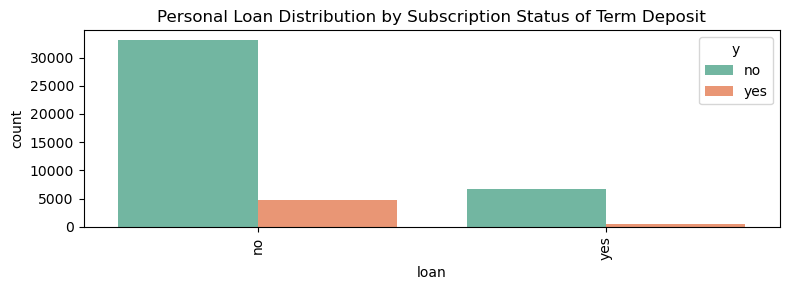

In [61]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="loan",hue='y',palette="Set2")
plt.title("Personal Loan Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [62]:
inp0.groupby("loan")["y"].value_counts()

loan  y  
no    no     33162
      yes     4805
yes   no      6760
      yes      484
Name: count, dtype: int64

- 16,727 customers without a housing loan did not subscribe to the term deposit.
- 3,354 customers without a housing loan did subscribe to the term deposit
- 23,195 customers with a housing loan did not subscribe to the term deposit.
- 1,935 customers with a housing loan did subscribe to the term deposit.
- This indicates that customers without a housing loan are more likely to subscribe to the term deposit compared to those with a housing loan.

#### contact Vs Target feature

- The contact feature indicates number of contacts performed during this campaign and for this client.

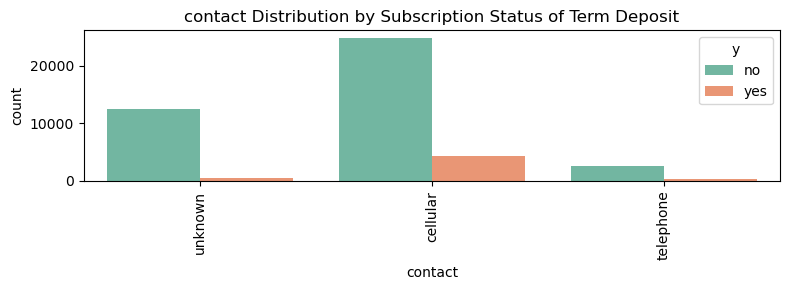

In [63]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="contact",hue='y',palette="Set2")
plt.title("contact Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [64]:
inp0.groupby("contact")["y"].value_counts()

contact    y  
cellular   no     24916
           yes     4369
telephone  no      2516
           yes      390
unknown    no     12490
           yes      530
Name: count, dtype: int64

- <b>Cellular contact</b> has the highest count of both non-subscribers (24,916) and subscribers (4,369) to the term deposit.

- <b>Telephone contact</b> has a significantly lower count, with 2,516 non-subscribers and 390 subscribers.

- <b>The 'unknown' contact</b> category, which likely represents missing or unspecified data, has 12,490 non-subscribers and 530 subscribers.

- These observations indicate that customers contacted via cellular means are more likely to subscribe to the term deposit compared to those contacted via telephone or those with unknown contact methods.

#### day Vs Target feature

- The day feature indicates last contact day of the month.

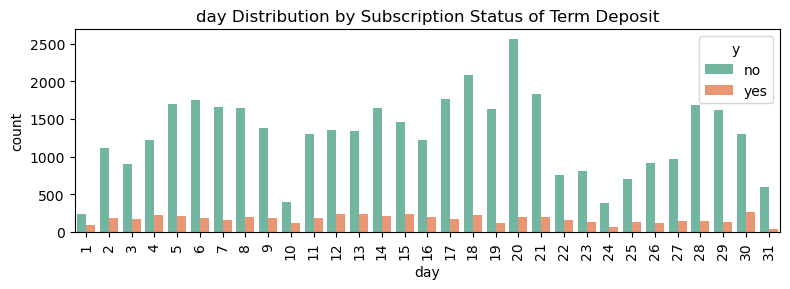

In [65]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="day",hue='y',palette="Set2")
plt.title("day Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [66]:
inp0.groupby("day")['y'].value_counts(normalize=True)*100

day  y  
1    no     72.049689
     yes    27.950311
2    no     85.924207
     yes    14.075793
3    no     83.503244
              ...    
29   yes     7.392550
30   no     82.694764
     yes    17.305236
31   no     92.846034
     yes     7.153966
Name: proportion, Length: 62, dtype: float64

- On day 1, approximately 72.05% of customers did not subscribe to the term deposit, while 27.95% did.
- On day 2, about 85.92% of customers did not subscribe, and 14.08% did.
- On day 3, around 83.50% of customers did not subscribe.
- On day 29, 7.39% of customers subscribed to the term deposit.
- On day 30, 82.69% of customers did not subscribe, while 17.31% did.
- On day 31, 92.85% of customers did not subscribe, and 7.15% did.
- These observations indicate that the majority of customers did not subscribe to the term deposit across most days, with day 30 showing a relatively higher subscription rate compared to other days.

#### month Vs Target feature

- The month feature indicates last contact month of year.

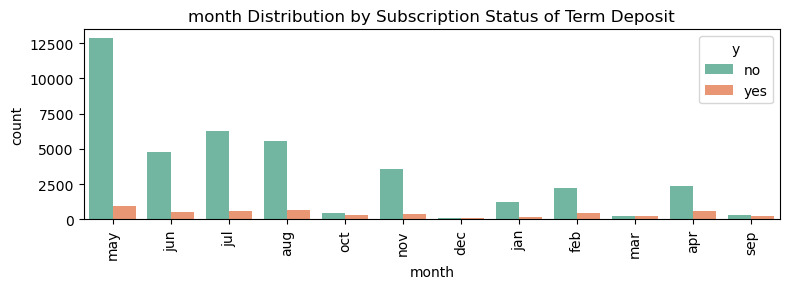

In [67]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="month",hue='y',palette="Set2")
plt.title("month Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [68]:
inp0.groupby("month")['y'].value_counts(normalize=True)*100

month  y  
apr    no     80.320600
       yes    19.679400
aug    no     88.986714
       yes    11.013286
dec    no     53.271028
       yes    46.728972
feb    no     83.352208
       yes    16.647792
jan    no     89.878831
       yes    10.121169
jul    no     90.906454
       yes     9.093546
jun    no     89.777195
       yes    10.222805
mar    yes    51.991614
       no     48.008386
may    no     93.280546
       yes     6.719454
nov    no     89.848866
       yes    10.151134
oct    no     56.233062
       yes    43.766938
sep    no     53.540587
       yes    46.459413
Name: proportion, dtype: float64

- These observations highlight that <b>March</b> has the highest subscription rate, while <b>May</b> has the lowest. <b>December</b>, <b>October</b>, and <b>September</b> also show relatively high subscription rates compared to other months.

#### duration Vs Target feature

- The duration feature indicates last contact duration, in seconds.

Text(0, 0.5, 'Count')

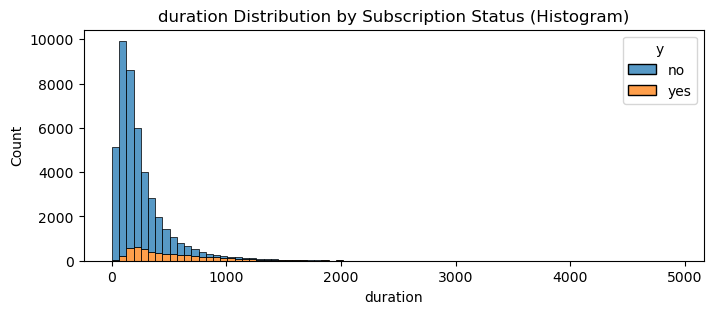

In [69]:
plt.figure(figsize=(8,3))
sns.histplot(data=inp0, x='duration', bins=95-18+1, hue='y', multiple='stack')
plt.title('duration Distribution by Subscription Status (Histogram)')
plt.xlabel('duration')
plt.ylabel('Count')

### poutcome Vs Target feature

- The poutcome feature indicates outcome of the previous marketing campaign.

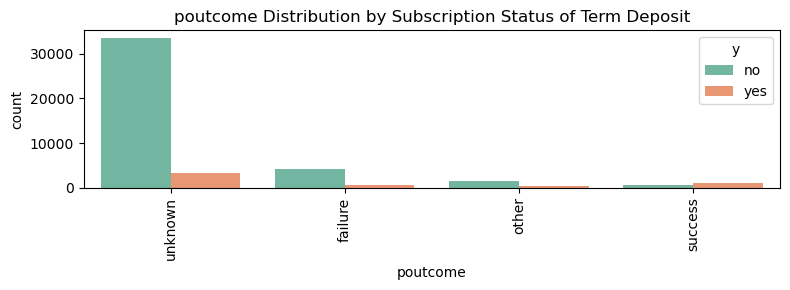

In [70]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="poutcome",hue='y',palette="Set2")
plt.title("poutcome Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [71]:
inp0.groupby("poutcome")["y"].value_counts()

poutcome  y  
failure   no      4283
          yes      618
other     no      1533
          yes      307
success   yes      978
          no       533
unknown   no     33573
          yes     3386
Name: count, dtype: int64

- <b>Failure</b>: 4,283 customers with a previous outcome of failure did not subscribe to the term deposit, while 618 did.
- <b>Other</b>: 1,533 customers with a previous outcome categorized as 'other' did not subscribe, while 307 did.
- <b>Success</b>: 978 customers with a previous successful outcome subscribed to the term deposit, while 533 did not.
- <b>Unknown</b>: 33,573 customers with an unknown previous outcome did not subscribe, while 3,386 did.


- These observations indicate that customers with a previous successful outcome are more likely to subscribe to the term deposit compared to those with a previous outcome of failure or other. The 'unknown' category has the highest count of both non-subscribers and subscribers, likely due to the large number of customers with unspecified previous outcomes.

# Preprocessing

In [72]:
inp0.drop(['target_flag','age_group'],inplace=True,axis=1)

In [73]:
inp0['month'] = inp0['month'].replace({"jan": 1, "feb": 2, "mar" :3,
                                   "apr":4 ,"may": 5, "jun":6,
                                   "jul":7 , "aug":8, "sep": 9,
                                   "oct": 10, "nov": 11 , "dec":12})

#### Encoding Categorical features

There are several categorical features in the data that need to be binary encoded using dummy variables, a process also known as <b> one-hot encoding </b>. The Pandas method <b>get_dummies()</b> is used to encode these categorical features and create the necessary dummy variables.

In [74]:
inp0 = pd.get_dummies(inp0,columns=['job','marital','education','contact','poutcome'],
                      drop_first=True,dtype=int)

In [75]:
inp0.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,no,29,yes,no,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,no,2,yes,yes,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,no,1506,yes,no,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,no,1,no,no,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [76]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  int64 
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_blue-collar      45211 non-null  int32 
 13  job_entrepreneur     45211 non-null  int32 
 14  job_housemaid        45211 non-null  int32 
 15  job_management       45211 non-null  int32 
 16  job_

In [77]:
Categorical_columns = inp0.select_dtypes("O").columns
Categorical_columns

Index(['default', 'housing', 'loan', 'y'], dtype='object')

In [78]:
numerical_columns = inp0.select_dtypes("number").columns
numerical_columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

#### Encoding remaining Categorical Columns 

In [79]:
inp0['default'] = inp0['default'].replace({"yes": 1 , "no": 0})
inp0['housing'] = inp0['housing'].replace({"yes": 1 , "no": 0})
inp0['loan'] = inp0['loan'].replace({"yes": 1 , "no": 0})
inp0['y'] = inp0['y'].replace({"yes": 1 , "no": 0})

In [80]:
inp0.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [81]:
inp0['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [82]:
inp0.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

# Balancing Dataset by using SMOTE 

SMOTE (Synthetic Minority Over-sampling Technique) is a popular method for handling imbalanced datasets. It works by generating synthetic samples for the minority class to balance the dataset.

<b>SMOTE (Synthetic Minority Oversampling Technique)</b> method performs sampling:

1. <b>Identify the Minority Class</b>: Start by recognizing the minority class in your dataset. This is the class that has fewer instances compared to the majority class.
2. <b>Select a Minority Class Sample</b>: Randomly select a sample from the minority class.
3. <b>Find Nearest Neighbors</b>: Identify the k-nearest neighbors for the selected sample within the minority class. Typically, k is set to 5.
4. <b>Randomly Select a Neighbor</b>: From the k-nearest neighbors, randomly select one neighbor.
5. <b>Generate Synthetic Sample</b>: Create a new synthetic sample by interpolating between the selected sample and the randomly chosen neighbor. This is done by taking a weighted average of the two samples.
6. <b>Repeat</b>: Repeat steps 2-5 until the desired number of synthetic samples is generated to balance the dataset.

In [83]:
# separating features (X) and target (y)
X = inp0.drop('y',axis=1)
y = inp0['y']

In [84]:
# Apply SMOTE to the features
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

# create new balnced data set
inp1 = pd.concat([X_resampled,y_resampled],axis=1)

#Check the class distribution in the balanced dataset
inp1['y'].value_counts()

y
0    39922
1    39922
Name: count, dtype: int64

In [85]:
# Checking for duplciates
inp1.duplicated().sum()

1010

In [86]:
# Dupliated observations
inp1[inp1.duplicated()]

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
45665,34,0,172,0,0,9,6,769,3,-1,...,0,1,0,0,0,0,0,0,1,1
45722,61,0,6,1,0,13,10,215,1,182,...,0,0,1,0,0,0,0,1,0,1
46533,28,0,721,0,0,21,4,628,1,-1,...,0,0,0,0,0,0,0,0,1,1
46763,53,0,0,0,0,15,10,133,2,91,...,0,0,1,0,0,0,0,1,0,1
46843,33,0,801,0,0,7,5,683,1,-1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79809,26,0,2522,0,0,26,7,415,1,-1,...,0,0,1,0,0,0,0,0,1,1
79813,49,0,709,1,0,9,6,1252,3,-1,...,0,1,0,0,0,0,0,0,1,1
79818,34,0,143,1,0,11,5,670,1,-1,...,0,0,0,0,0,1,0,0,1,1
79819,42,0,4754,0,0,22,7,711,5,-1,...,0,0,0,0,0,0,0,0,1,1


In [87]:
#Removing dupplicates
inp1.drop_duplicates(inplace=True)

In [88]:
# Checking for duplciates after removing the duplicates.
inp1.duplicated().sum()

0

In [89]:
#Check the class distribution in the balanced dataset
inp1['y'].value_counts()

y
0    39922
1    38912
Name: count, dtype: int64

# Scaling features except the target feature 

The <b>StandardScaler</b> is a feature scaling technique provided by the <b>scikit-learn</b> library in Python. It standardizes features by removing the mean and scaling to unit variance. It transforms the data such that the distribution has a mean value of 0 and a standard deviation of 1. This is done using the formula:

𝑧 = (𝑥−𝜇)/𝜎
where:

𝑥  is the original feature value.

𝜇  is the mean of the feature values.

𝜎  is the standard deviation of the feature values.

Standardizing features is important for many machine learning algorithms that assume the input features are centered around zero and have approximately the same variance.

In [90]:
# Befroe scaling data
inp1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,1,0,0,1,0,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,1,1,0,0,0,1,0,0,1,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,1,0,0,0,1,0,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,1,0,1,0,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,1,0,0,1,0,1,0,0,1,0


In [91]:
scaler = StandardScaler()

for col in inp1.select_dtypes(include=['number']).columns:
    if col != 'y':
        inp1[col] = scaler.fit_transform(inp1[[col]])
        
inp1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.562304,-0.105144,0.184005,1.260238,-0.328629,-1.318711,-0.439054,-0.330625,-0.525759,-0.489021,...,-0.539391,-0.790998,1.801961,-0.160093,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0
1,0.281370,-0.105144,-0.479061,1.260238,-0.328629,-1.318711,-0.439054,-0.648255,-0.525759,-0.489021,...,1.853942,1.264226,-0.554951,-0.160093,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0
2,-0.725077,-0.105144,-0.487529,1.260238,3.042943,-1.318711,-0.439054,-0.864821,-0.525759,-0.489021,...,-0.539391,1.264226,-0.554951,-0.160093,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0
3,0.555856,-0.105144,-0.015793,1.260238,-0.328629,-1.318711,-0.439054,-0.818620,-0.525759,-0.489021,...,-0.539391,-0.790998,-0.554951,6.246380,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0
4,-0.725077,-0.105144,-0.487843,-0.793501,-0.328629,-1.318711,-0.439054,-0.512541,-0.525759,-0.489021,...,1.853942,-0.790998,-0.554951,6.246380,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0


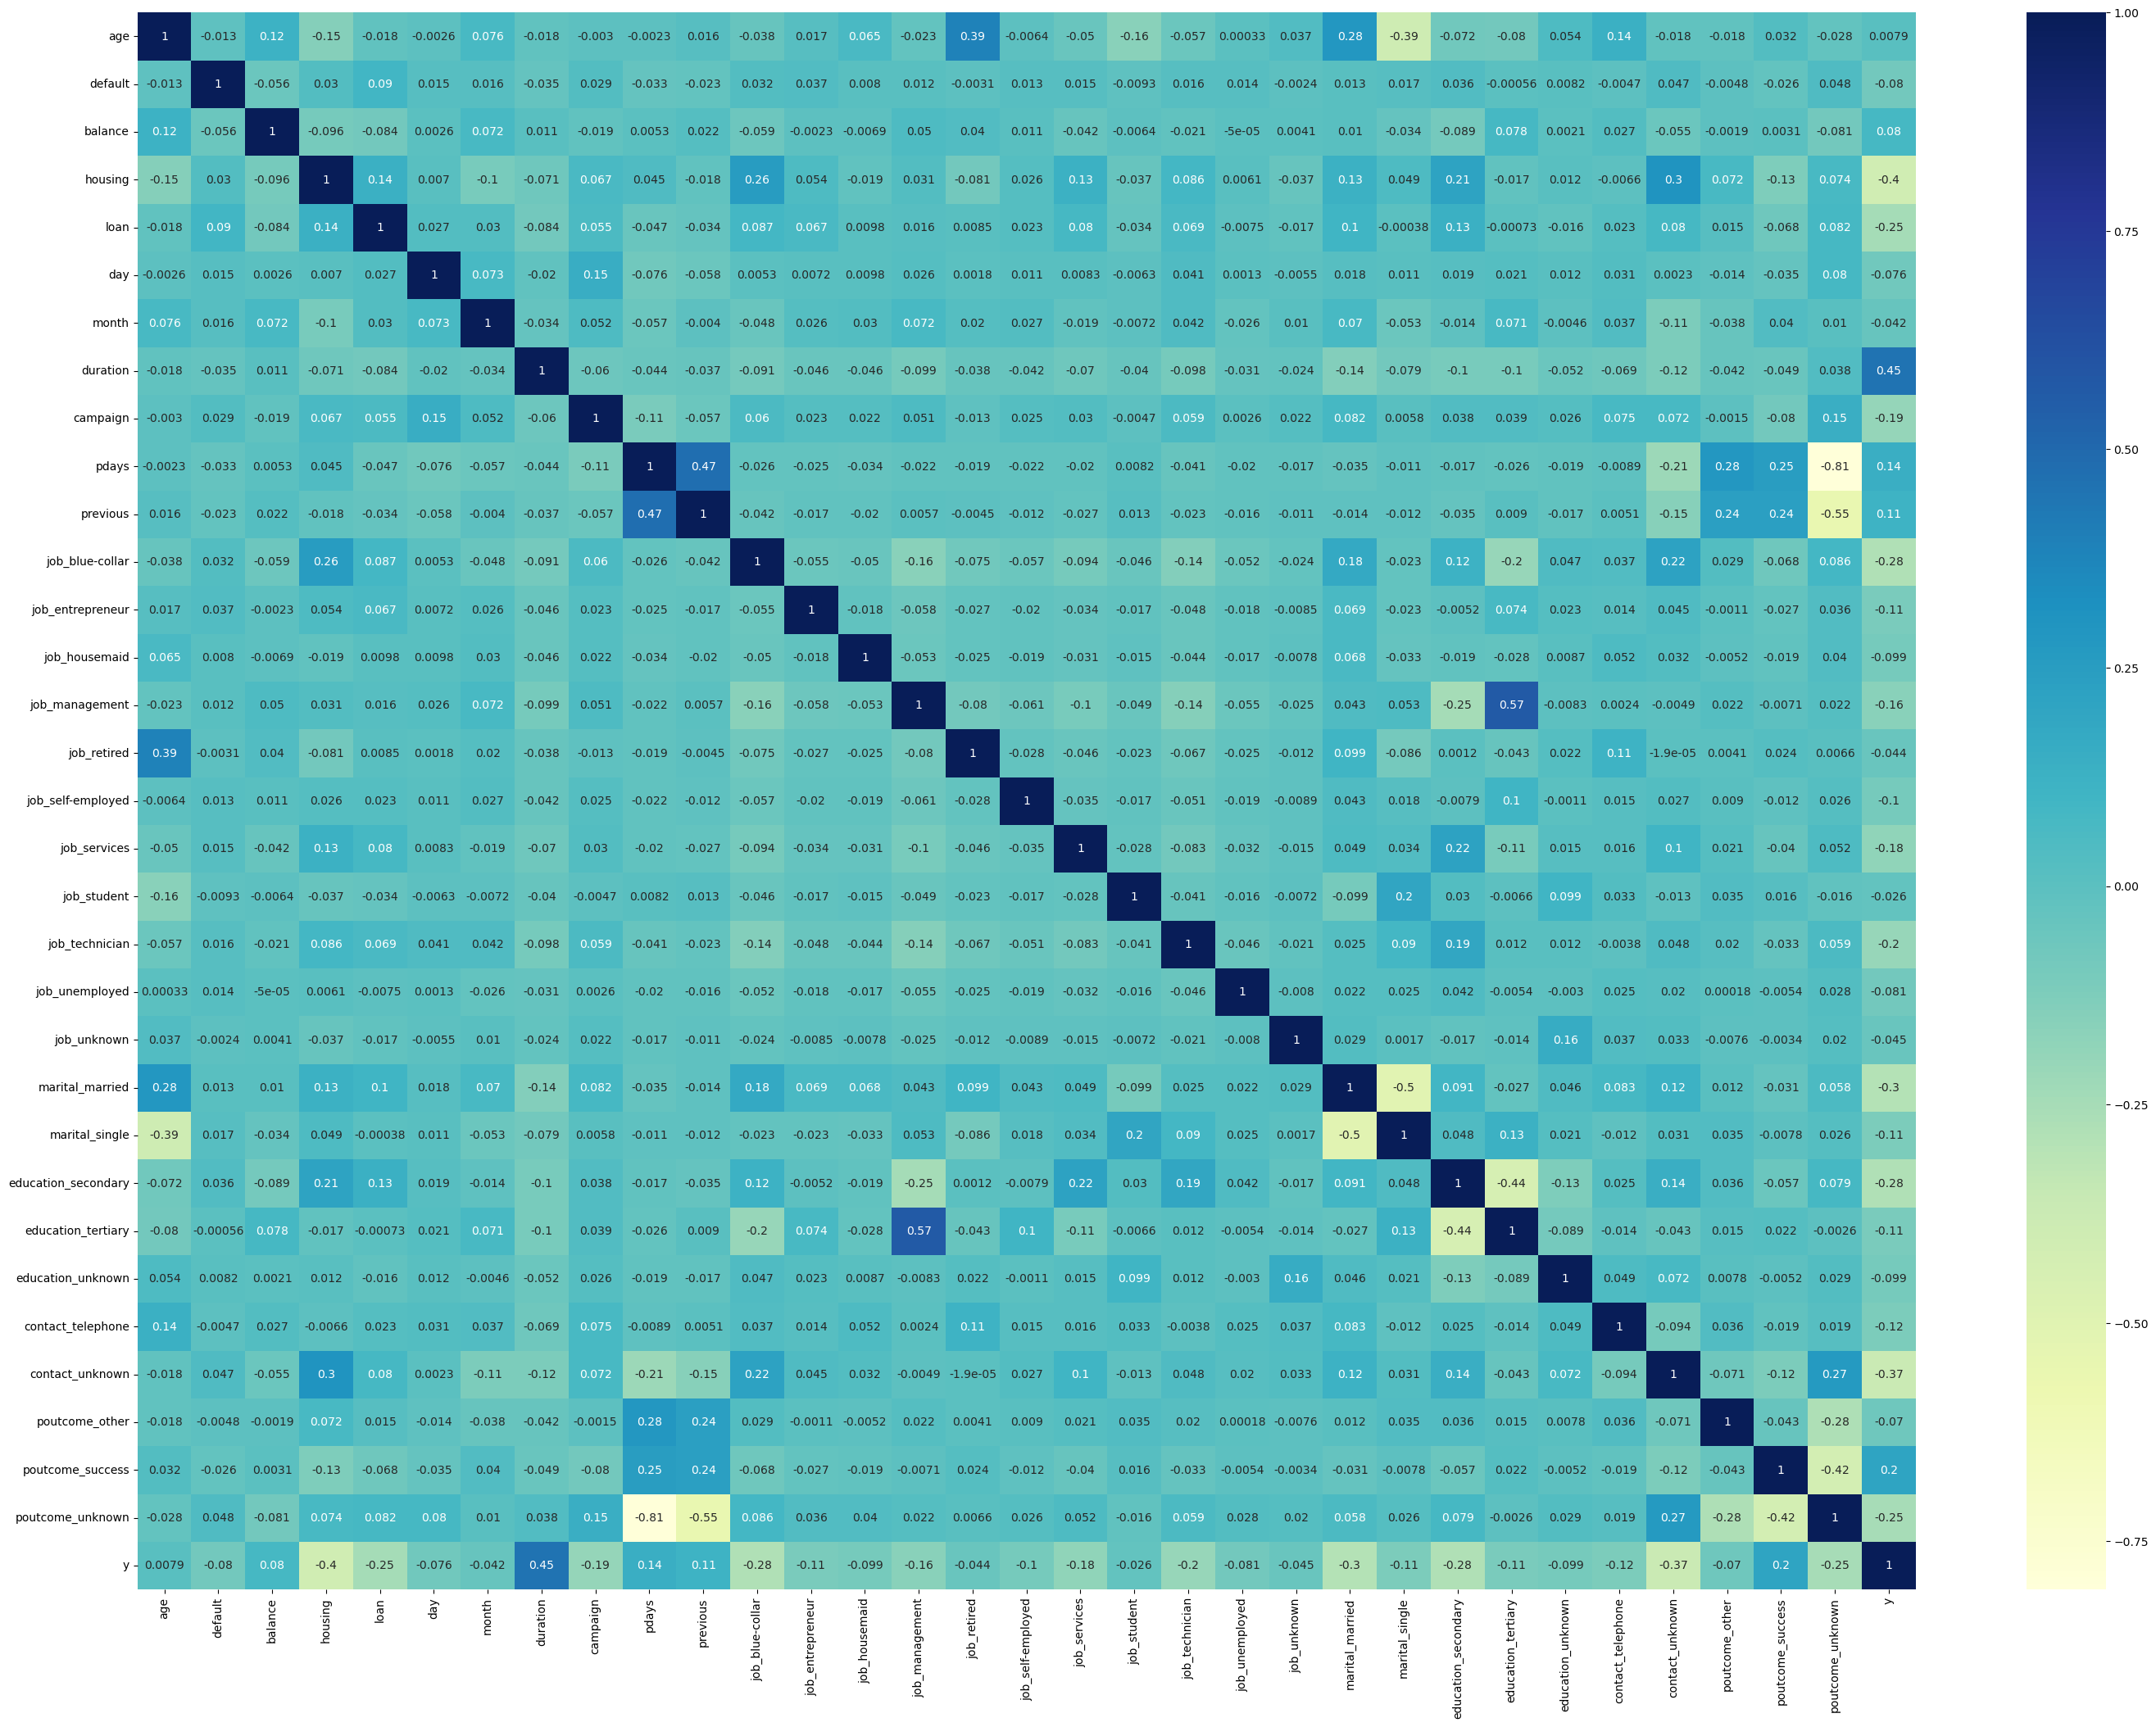

In [92]:
plt.figure(figsize = (35, 25))
sns.heatmap(inp1.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Model Building and Evalaution

### Train and Test Split

The <b>train_test_split</b> function from the scikit-learn library is a handy tool for splitting your dataset into training and testing sets. This is a crucial step in the machine learning workflow to evaluate the performance of your model. Here's a detailed explanation

The main goal of train_test_split is to divide your dataset into two parts:

<b>Training Set</b>: Used to train your machine learning model.

<b>Testing Set</b>: Used to evaluate the performance of your trained model on unseen data.

In [93]:
from sklearn.feature_selection import RFE

# Assuming X represents your features and y represents your target variable
X = inp1.drop("y",axis=1)
y = inp1["y"]
print(X.shape)
print(y.shape)

(78834, 32)
(78834,)


In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("XTrain set Shape:",X_train.shape)
print("yTrain set Shape:",y_train.shape)
print("XTest  set Shape:",X_test.shape)
print("yTest  set Shape:",y_test.shape)

XTrain set Shape: (63067, 32)
yTrain set Shape: (63067,)
XTest  set Shape: (15767, 32)
yTest  set Shape: (15767,)


# Decision Tree Alogorithm instituation wihthout top10 feautes

The <b>Decision-Tree algorithm</b> is a widely utilized supervised machine learning technique, applicable for both classification and regression tasks. Its basic concept is simple and easy to understand..

Here's the process of how the Decision-Tree algorithm functions:

1. For each attribute in the dataset, the algorithm generates a node.

2. The most important attribute is placed at the root node.

3. To evaluate the task, we begin at the root node and move down the tree, following the nodes that align with our conditions or decisions.

4. This procedure continues until we reach a leaf node, which contains the prediction or result of the Decision Tree.

One of the primary challenges in implementing a Decision Tree is determining the attributes to be used as the root node and at each subsequent level. This task, known as attribute selection, involves various measures to identify the most suitable attribute for each level.

Two widely-used measures for attribute selection are:

- <b> Information Gain

- <b> Gini Index

When using Information Gain as a criterion, attributes are assumed to be categorical. In contrast, the Gini Index assumes attributes are continuous. These attribute selection measures are explained below.

### Building Decision Tree classification using Gini criteria

##### Gini Index

The Gini Index, often referred to as Gini Impurity, is a metric used in Decision Tree algorithms to identify the best attribute for data splitting at each node. It aids in choosing the attribute that will produce the most homogeneous branches.

The Gini Index can be illustrated with the following diagram:-

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)

Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.

Steps in Decision Tree

1. Gini Calculation for Each Split: For each attribute, determine the Gini Index for all potential splits.
2. Choosing the Optimal Split: Select the split that has the lowest Gini Index, as it signifies the highest purity
3. Recursive Process:: Repeat this procedure recursively for each branch until the specified stopping criteria are met (e.g., maximum depth, minimum samples per leaf).

In [95]:
dt_gini = DecisionTreeClassifier(criterion="gini",max_depth=3)

#Fitting Model
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

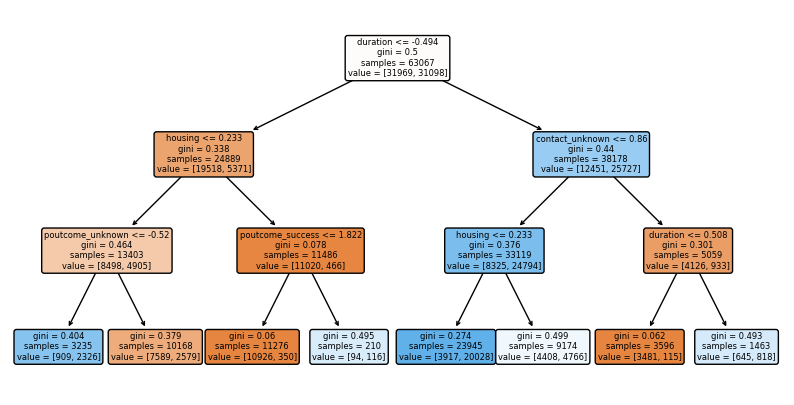

In [96]:
from sklearn import tree
plt.figure(figsize=(10,5))  
_ = tree.plot_tree(dt_gini, feature_names = X_train.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()

##### Measuring Test Accuracy

In [97]:
# Prediction
y_pred = dt_gini.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

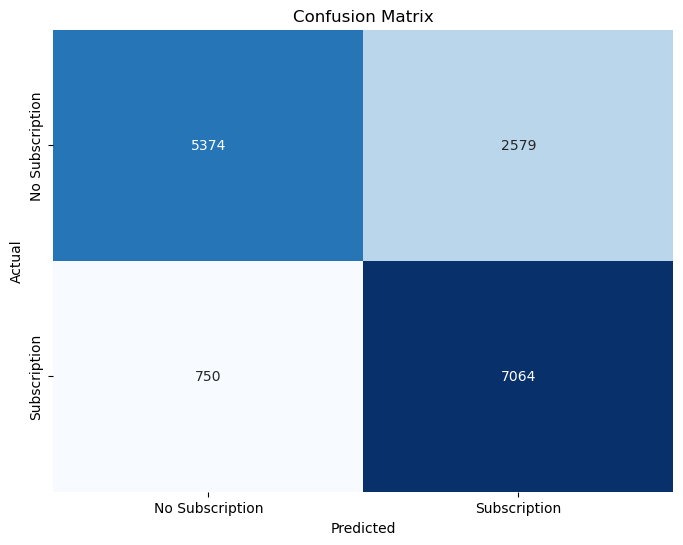

In [123]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Subscription', 'Subscription'], yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [100]:
print(classification_report(y_test, y_pred))    #Classification Report for test set

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      7953
           1       0.74      0.90      0.81      7814

    accuracy                           0.79     15767
   macro avg       0.81      0.79      0.79     15767
weighted avg       0.81      0.79      0.79     15767



#### Precision, Recall, F1-Score, and Support:

<b>Precision</b>: This metric indicates the proportion of true positives among all positive predictions. For class 0, the precision is 0.87, and for class 1, it's 0.74. This means that when the model predicts class 0, it's correct 87% of the time, and for class 1, it's correct 74% of the time.

<b>Recall</b>: This metric shows the proportion of true positives correctly identified by the model out of all actual positives. For class 0, recall is 0.69, and for class 1, it's 0.90. This indicates that 69% of actual class 0 instances were correctly identified, and 90% of actual class 1 instances were correctly identified.

<b>F1-Score</b>: This is the harmonic mean of precision and recall, providing a balance between the two. The F1-score for class 0 is 0.77, and for class 1, it's 0.81, showing that class 1 is slightly better predicted overall.

<b>Support</b>: This indicates the number of actual occurrences of each class in the dataset. There are 7,953 instances of class 0 and 7,814 instances of class 1.

<b>Accuracy</b>: This is the overall proportion of correct predictions (both true positives and true negatives) out of all predictions. The accuracy of your model is 0.79, meaning it correctly classifies 79% of the instances.

<b>Summary</b>: Your model has an overall accuracy of 79%, and it performs slightly better on class 1 (with higher recall and F1-score) compared to class 0. The precision and recall for both classes suggest that the model is relatively balanced in its performance, but there is room for improvement, particularly in recall for class 0.

#### Check for overfitting and underfitting

In [101]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_gini.score(X_test, y_test)))

Training set score: 0.7936
Test set score: 0.7920


Model appears to be performing well on both the training set and the test set, indicating good generalization. The scores are close to each other, which suggests that the model is not overfitting or underfitting.

In machine learning, overfitting occurs when a model learns the training data too well, including the noise and outliers, which can reduce its performance on unseen data. On the other hand, underfitting occurs when the model is too simple to capture the underlying patterns in the data.

With a small difference between the training and test scores (0.7936 and 0.7920, respectively), it seems like model strikes a good balance.

### Building Decision Tree classification using Entropy criteria

### **Entropy**

Entropy quantifies the impurity within a dataset. In Physics and Mathematics, it is known as the randomness or uncertainty of a random variable 𝑋. In information theory, entropy refers to the impurity within a group of examples. **Information** gain is the reduction in entropy. It measures the difference between the entropy before a split and the average entropy after splitting the dataset based on specific attribute values.. 

Entropy is represented by the following formula:-

![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Here, **c** is the number of classes and **pi** is the probability associated with the ith class.

In [102]:
dt_entropy = DecisionTreeClassifier(criterion="entropy",max_depth=3)

#Fitting Model
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

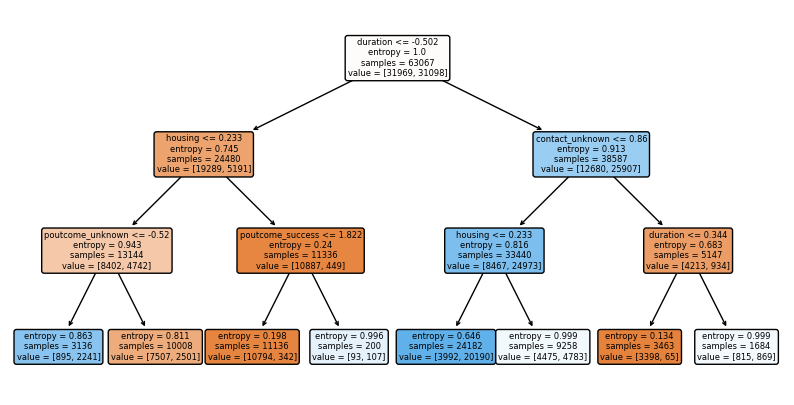

In [103]:
plt.figure(figsize=(10,5))
_ = tree.plot_tree(dt_entropy,feature_names=X_train.columns,filled=True, fontsize=6, rounded = True)
plt.show()

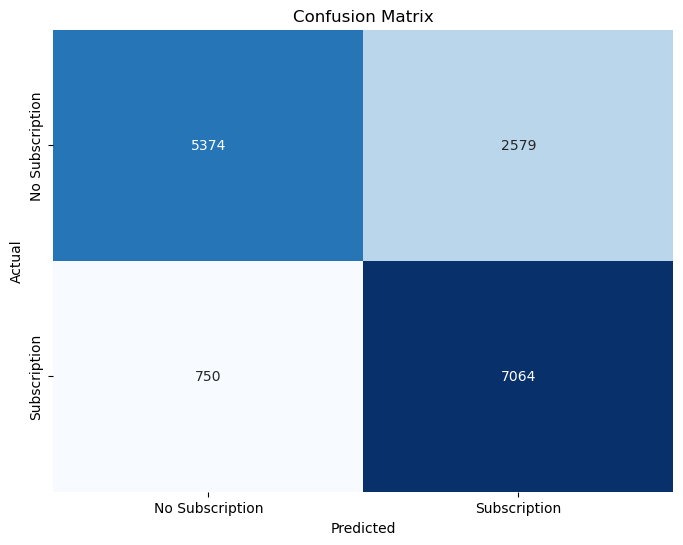

In [122]:
# Prediction
y_pred = dt_entropy.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Subscription', 'Subscription'], yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [105]:
print(classification_report(y_test, y_pred))    #Classification Report for test set

              precision    recall  f1-score   support

           0       0.88      0.68      0.76      7953
           1       0.73      0.90      0.81      7814

    accuracy                           0.79     15767
   macro avg       0.81      0.79      0.79     15767
weighted avg       0.81      0.79      0.79     15767



**1.Precision**: This is the ratio of true positive predictions to the total number of positive predictions made by the model. For class 0, precision is 0.88, and for class 1, it's 0.73. This means that when the model predicts class 0, it's correct 88% of the time, and when it predicts class 1, it's correct 73% of the time.

**2.Recall**: This is the ratio of true positive predictions to the actual number of positives in the dataset. For class 0, recall is 0.68, and for class 1, it's 0.90. This means that 68% of actual class 0 instances were correctly identified, while 90% of actual class 1 instances were correctly identified.

**3.F1-Score**: This metric balances precision and recall, providing a single score that takes both into account. For class 0, the F1-score is 0.76, and for class 1, it's 0.81, indicating better overall performance for class 1.

**4.Support**: This is the number of actual instances for each class in the dataset. There are 7,953 instances of class 0 and 7,814 instances of class 1.

**Accuracy**: The overall accuracy of the model is 0.79, meaning the model correctly classifies 79% of the instances in the dataset.

**Summary**: Model shows an overall accuracy of 79%, with better precision but lower recall for class 0 compared to class 1. Class 1 is predicted more accurately overall, as indicated by its higher F1-score. The model seems to perform reasonably well, but there is a slight imbalance in recall between the classes.

#### Check for overfitting and underfitting

In [106]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt_entropy.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_entropy.score(X_test, y_test)))

Training set score: 0.7910
Test set score: 0.7889


inference on DT model with Entropty from "Training set score: 0.7910 Test set score: 0.7889"

**Training Set Score**: 0.7910 
**Test Set Score**    : 0.7889

DT model with Entropty  appears to be performing consistently on both the training and test sets, with the scores being very close to each other. This indicates that the model is generalizing well and is neither overfitting nor underfitting. Here's a brief analysis:

**Training Set Score (0.7910)**: This score reflects how well your model performs on the training data, with 79.10% of the predictions being correct.

**Test Set Score (0.7889)**: This score reflects your model's performance on unseen data, with 78.89% of the predictions being correct.

The small difference between the training and test scores suggests that the model is robust and performs well on new data, maintaining similar accuracy.

In **summary**, decision tree model using entropy as a criterion seems to be well-tuned and balanced, providing a reliable performance across both the training and test datasets.

### Finding Optimal Paramters for Parameters throguh Gridsearch

The sklearn.model_selection module offers a feature called GridSearchCV, which explores a set of potential hyperparameter values and identifies the most optimal one. GridSearchCV requires an accuracy metric to guide the search for the optimal value. For classification tasks, ROC AUC values are commonly used. It employs k-fold cross-validation to measure and validate accuracy.

GridSearchCV can be applied to any machine learning model and can search through multiple hyperparameters of the model. It takes the following arguments:

1. estimator
2. param_grid
3. scoring
4. cv

Decision Tree Hyperparamets

5. criterion
6. max_depths
7. min_samples_split
8. min_samples_leaf

In [112]:
from sklearn.model_selection import GridSearchCV

#Defining hyperparameters

tuned_parameters = {"criterion":['gini','entropy'],
                    "max_depth":range(1,10),
                    "min_samples_split":range(1,10),
                    "min_samples_leaf":range(1,5)}

# Invoking Decision Tree
decision_tree = DecisionTreeClassifier()

gridcv = GridSearchCV(decision_tree,
                      param_grid =tuned_parameters,
                      cv = 5,
                      verbose = 1,
                      n_jobs = 1,
                      scoring = 'roc_auc')

In [113]:
# fitting on X_train and y_train
gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='roc_auc', verbose=1)

#### Finding best hyperparameter

In [114]:
gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [116]:
gridcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=3)

In [117]:
gridcv.best_score_

0.9457791964064984

Accuracy Score : 0.89


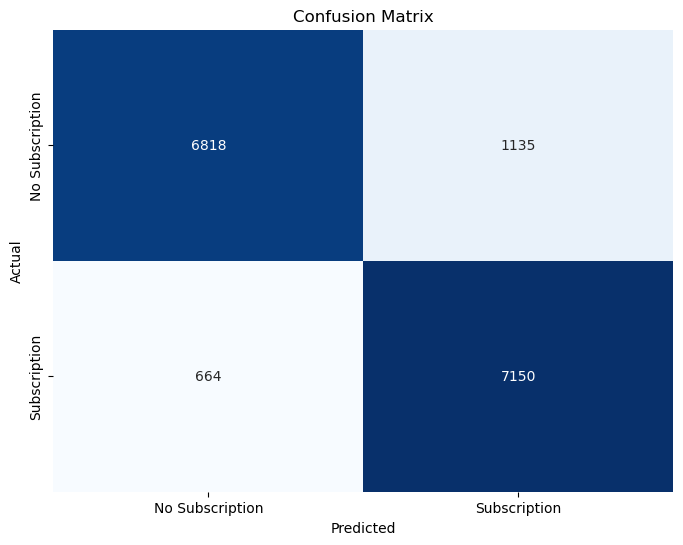

In [121]:
# Train the model with best estomators
best_estimator_dt = gridcv.best_estimator_
best_estimator_dt.fit(X_train,y_train)

# Make prediction on the best estimator
y_pred = best_estimator_dt.predict(X_test)

print(f'Accuracy Score : {accuracy_score(y_test,y_pred):.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Subscription', 'Subscription'], yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [119]:
#Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7953
           1       0.86      0.91      0.89      7814

    accuracy                           0.89     15767
   macro avg       0.89      0.89      0.89     15767
weighted avg       0.89      0.89      0.89     15767



**Precision, Recall, F1-Score, and Support:

**Precision**: This metric tells you the proportion of true positive predictions among all positive predictions. For class 0, the precision is 0.91, and for class 1, it's 0.86. This indicates that the model is quite accurate when predicting both classes.

**Recall**: This measures the proportion of true positives identified out of all actual positives. For class 0, the recall is 0.86, and for class 1, it's 0.91. This suggests that the model is able to correctly identify a high percentage of actual instances for both classes.

**F1-Score**: The F1-score is the harmonic mean of precision and recall, balancing the two. For class 0, the F1-score is 0.88, and for class 1, it's 0.89, showing strong performance in predicting both classes.

**Support**: This indicates the number of actual instances in each class. There are 7,953 instances of class 0 and 7,814 instances of class 1 in the dataset.

**Accuracy**: The overall accuracy of your model is 0.89, meaning the model correctly classifies 89% of the instances.

**Macro Average**: This is the unweighted average of precision, recall, and F1-score across both classes. The macro average precision, recall, and F1-score are all 0.89, indicating consistent performance across both classes.

**Weighted Average**: This average is weighted by the number of instances in each class. The weighted average precision, recall, and F1-score are all 0.89, suggesting balanced performance taking into account the class distribution.

**Summary**: Your model achieves an overall accuracy of 89%, with high precision, recall, and F1-scores for both classes, indicating that it performs very well in distinguishing between the two classes. The slightly higher F1-score for class 1 shows that the model may be slightly better at predicting this class. However, the overall performance metrics suggest a robust and well-performing model.

In [120]:
# Checking overfillting and undefitting print the scores on training and test set

print('Training set score: {:.4f}'.format(best_estimator_dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(best_estimator_dt.score(X_test, y_test)))

Training set score: 0.8999
Test set score: 0.8856


Training Set Score: 0.8999 Test Set Score: 0.8856

This model seems to be performing quite well on both the training and test sets, as indicated by these scores. Here’s a quick analysis:

Training Set Score (0.8999): This score reflects how well your model performs on the training data, with approximately 89.99% of the predictions being correct.

Test Set Score (0.8856): This score indicates the model’s performance on unseen data, with approximately 88.56% of the predictions being correct.

The scores are fairly close, suggesting that the model generalizes well and avoids significant overfitting or underfitting. A small difference between the training and test set scores indicates that the model maintains similar accuracy on new data, implying robustness and reliability in its predictions.

In summary, this model shows strong performance with high accuracy on both the training and test datasets. This indicates that your model is well-tuned and effective in making predictions.